In [30]:
import pandas as pd
import numpy as np
import math
import os
from scipy.stats import skew as skewness
import matplotlib.pyplot as plt

In [3]:
# VODS disciplines codes:
discipline_codes=['0101',
'0102',
'0103',
'0104',
'0105',
'0106',
'0107',
'0199',
'0201',
'0202',
'0203',
'0204',
'0205',
'0206',
'0207',
'0208',
'0299',
'0301',
'0302',
'0303',
'0304',
'0305',
'0306',
'0399',
'0401',
'0402',
'0499',
'0501',
'0502',
'0503',
'0504',
'0505',
'0506',
'0507',
'0508',
'0599',
'0601',
'0602',
'0603',
'0604',
'0699',
'0700']

In [4]:
def lower_triangle(matrix):
    lower=[]
    for i in range(len(matrix)):
        for j in range(i):
            lower=lower+[matrix[i,j]]
    return lower

# Skewness, deviation and density

<AxesSubplot:ylabel='Count'>

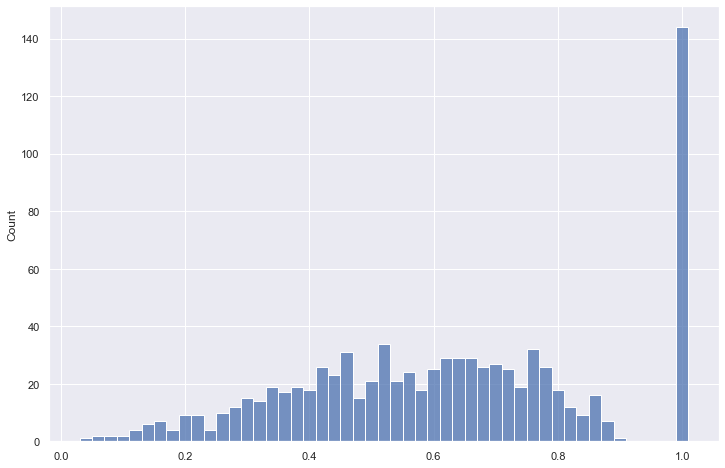

In [10]:
import seaborn as sns
sns.set(rc={"figure.figsize": (12,8)})
cur_path = os.getcwd()
count = 'project'
normalization = 'ochiai'
filename = 'dm_' + normalization + '_' +  count + '_all.csv'
new_path = os.path.relpath('..\\Distance_matrices\\new_dms/'+filename, cur_path)
df = pd.read_csv(new_path, index_col=0)
ar = np.array(lower_triangle(df.to_numpy()))

sns.histplot(ar, binwidth=0.02)

In [5]:
info=[]
for nor in ['ochiai','cosine']:
    for c in ['colab', 'project']:
        cur_path = os.getcwd()
        count = c
        normalization = nor
        filename = 'dm_' + normalization + '_' +  count + '_all.csv'
        new_path = os.path.relpath('..\\Distance_matrices\\new_dms/'+filename, cur_path)
        df = pd.read_csv(new_path,index_col=0)
        density=1 - np.count_nonzero(np.array(lower_triangle(df.to_numpy())) ==1)/len(lower_triangle(df.to_numpy()))
        row = [nor, c, skewness(lower_triangle(df.to_numpy())), np.std(lower_triangle(df.to_numpy())), density ]
        info=info+[row]

pd.DataFrame(info, columns=['normalization', 'count', 'skewness', 'std', 'density'])

,normalization,count,skewness,std,density
0,ochiai,colab,-0.081767,0.182637,0.975610
1,ochiai,project,-0.007384,0.241160,0.832753
2,cosine,colab,-2.584580,0.064771,1.000000
3,cosine,project,-2.120837,0.171291,0.980256


In [4]:
info=[]
for nor in ['ochiai','cosine']:
    for c in ['colab', 'project']:
        cur_path = os.getcwd()
        count = c
        normalization = nor
        filename = 'dm_' + normalization + '_41_' +  count + '_all.csv'
        new_path = os.path.relpath('..\\Distance_matrices\\new_dms/'+filename, cur_path)
        df = pd.read_csv(new_path,index_col=0)
        density=1 - np.count_nonzero(np.array(lower_triangle(df.to_numpy())) ==1)/len(lower_triangle(df.to_numpy()))
        row = [nor, c, skewness(lower_triangle(df.to_numpy())), np.std(lower_triangle(df.to_numpy())), density ]
        info=info+[row]

pd.DataFrame(info, columns=['normalization', 'count', 'skewness', 'std', 'density'])

,normalization,count,skewness,std,density
0,ochiai,colab,-0.084812,0.182699,0.979268
1,ochiai,project,0.004449,0.231859,0.873171
2,cosine,colab,-2.531743,0.065806,1.000000
3,cosine,project,-2.077070,0.172771,1.000000


In [55]:
info=[]
for nor in ['ochiai','cosine']:
    for c in ['colab', 'project', 'disc_in_a_person']:
        cur_path = os.getcwd()
        count = c
        normalization = nor
        filename = 'dm_' + count+ '_' + normalization + '.csv'
        new_path = os.path.relpath('..\\Distance_matrices\\dms_of_all_projects/'+filename, cur_path)
        df = pd.read_csv(new_path,index_col=0)
        density=1 - np.count_nonzero(np.array(lower_triangle(df.to_numpy())) ==1)/len(lower_triangle(df.to_numpy()))
        row = [nor, c, skewness(lower_triangle(df.to_numpy())), np.std(lower_triangle(df.to_numpy())), density ]
        info=info+[row]

pd.DataFrame(info, columns=['normalization', 'count', 'skewness', 'std', 'density'])

# Stability

In [16]:
info=[]
for nor in ['ochiai','cosine']:
    for c in ['colab', 'project']:
        for y in ['_141516', '_1718', '_192021']:
            cur_path = os.getcwd()
            count = c
            normalization = nor
            filename = filename = 'dm_' + normalization + '_' +  count + y + '.csv'
            new_path = os.path.relpath('..\\Distance_matrices\\new_dms/'+filename, cur_path)
            df = pd.read_csv(new_path,index_col=0)
            array=np.array(lower_triangle(df.to_numpy()))
            density=1 - np.count_nonzero(array ==1)/len(array)
            average=np.mean(array)
            if y in ['_1718', '_192021']:
                avg_change=np.mean(np.absolute(array-previous_array))
                max_change=np.max(np.absolute(array-previous_array))
            else:
                avg_change=0
                max_change=0
            previous_array= array 
            row = [y, nor, c, density, average, avg_change, max_change]
            info=info+[row]

pd.DataFrame(info, columns=['year', 'normalization', 'count', 'density', 'average', 'average change', 'max change '])

,year,normalization,count,density,average,average change,max change
0,_141516,ochiai,colab,0.904762,0.690286,0.000000,0.000
1,_1718,ochiai,colab,0.937282,0.680316,0.074813,0.570
2,_192021,ochiai,colab,0.951220,0.663453,0.075474,0.532
3,_141516,ochiai,project,0.735192,NaN,0.000000,0.000
4,_1718,ochiai,project,0.688734,0.743738,NaN,NaN
5,_192021,ochiai,project,0.672474,0.745827,0.118264,0.694
6,_141516,cosine,colab,1.000000,0.945928,0.000000,0.000
7,_1718,cosine,colab,1.000000,0.944746,0.016411,0.323
8,_192021,cosine,colab,1.000000,0.940453,0.018053,0.255
9,_141516,cosine,project,0.945412,0.957396,0.000000,0.000


In [5]:
info=[]
for nor in ['ochiai','cosine']:
    for c in ['colab', 'project']:
        for y in ['_141516', '_1718', '_192021']:
            cur_path = os.getcwd()
            count = c
            normalization = nor
            filename = filename = 'dm_' + normalization + '_41_' +  count + y + '.csv'
            new_path = os.path.relpath('..\\Distance_matrices\\new_dms/'+filename, cur_path)
            df = pd.read_csv(new_path,index_col=0)
            array=np.array(lower_triangle(df.to_numpy()))
            density=1 - np.count_nonzero(array ==1)/len(array)
            average=np.mean(array)
            if y in ['_1718', '_192021']:
                avg_change=np.mean(np.absolute(array-previous_array))
                max_change=np.max(np.absolute(array-previous_array))
            else:
                avg_change=0
                max_change=0
            previous_array= array 
            row = [y, nor, c, density, average, avg_change, max_change]
            info=info+[row]

pd.DataFrame(info, columns=['year', 'normalization', 'count', 'density', 'average', 'average change', 'max change '])

,year,normalization,count,density,average,average change,max change
0,_141516,ochiai,colab,0.924390,0.686623,0.000000,0.000
1,_1718,ochiai,colab,0.951220,0.676562,0.069771,0.490
2,_192021,ochiai,colab,0.959756,0.660789,0.072863,0.529
3,_141516,ochiai,project,0.721951,0.643544,0.000000,0.000
4,_1718,ochiai,project,0.723171,0.631557,0.100594,0.598
5,_192021,ochiai,project,0.704878,0.670838,0.164293,0.836
6,_141516,cosine,colab,1.000000,0.945120,0.000000,0.000
7,_1718,cosine,colab,1.000000,0.943776,0.015717,0.322
8,_192021,cosine,colab,1.000000,0.939313,0.017723,0.188
9,_141516,cosine,project,1.000000,0.841582,0.000000,0.000


In [21]:
info_1718=[]
info_192021=[]
for nor in ['ochiai','cosine']:
    for c in ['colab', 'project']:
        for y in ['_141516', '_1718', '_192021']:
            cur_path = os.getcwd()
            count = c
            normalization = nor
            filename = filename = 'dm_' + normalization + '_41_' +  count + y + '.csv'
            new_path = os.path.relpath('..\\Distance_matrices\\new_dms/'+filename, cur_path)
            df = pd.read_csv(new_path,index_col=0)
            array=np.array(lower_triangle(df.to_numpy()))
            density=1 - np.count_nonzero(array ==1)/len(array)
            average=np.mean(array)
            if y in ['_1718']:
                changes = array-previous_array
                info_1718=info_1718+[changes]
            if y in ['_192021']:
                changes = array-previous_array
                info_192021=info_192021+[changes]

            previous_array= array 
            



In [44]:
df_1718=pd.DataFrame(np.transpose(info_1718), columns=['Ochiai colab', 'Ochiai co-oc', 'Cosine colab', 'Cosine co-oc'])
df_192021=pd.DataFrame(np.transpose(info_192021), columns=['Ochiai colab', 'Ochiai co-oc', 'Cosine colab', 'Cosine co-oc'])

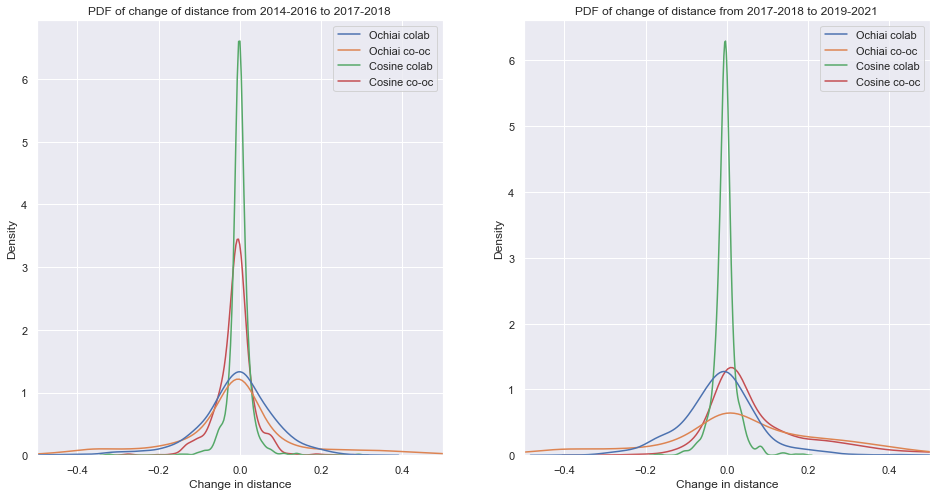

In [45]:
sns.set(rc={"figure.figsize": (16,8)})
fig,axes=plt.subplots(1,2)
sns.kdeplot(data=df_1718, ax=axes[0])
sns.kdeplot(data=df_192021, ax=axes[1])

axes[0].set_xlim(-0.5,0.5)
axes[1].set_xlim(-0.5,0.5)
axes[0].set_title('PDF of change of distance from 2014-2016 to 2017-2018')
axes[1].set_title('PDF of change of distance from 2017-2018 to 2019-2021')
axes[0].set_xlabel('Change in distance')
axes[1].set_xlabel('Change in distance')
plt.show()

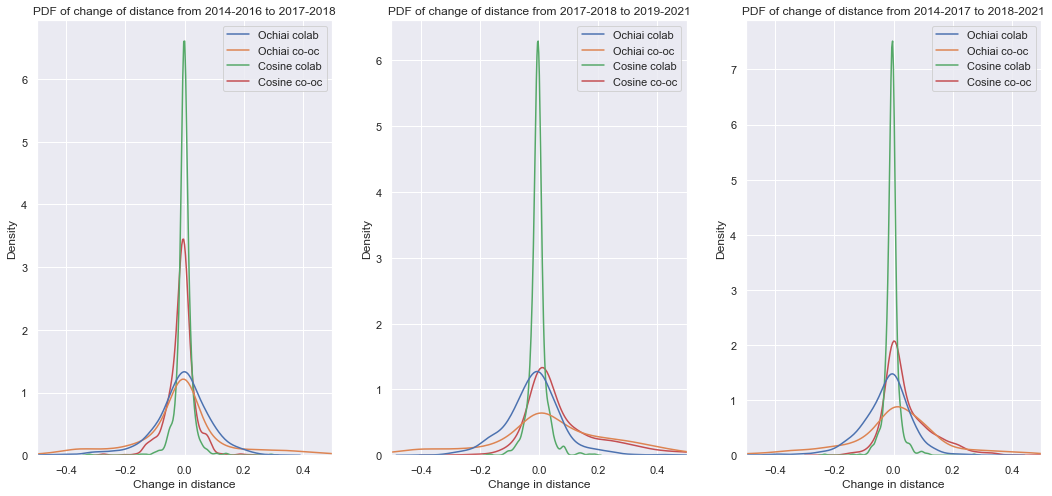

In [54]:
sns.set(rc={"figure.figsize": (18,8)})
fig,axes=plt.subplots(1,3)
sns.kdeplot(data=df_1718, ax=axes[0])
sns.kdeplot(data=df_192021, ax=axes[1])
sns.kdeplot(data=df_x, ax=axes[2])


axes[0].set_xlim(-0.5,0.5)
axes[1].set_xlim(-0.5,0.5)
axes[2].set_xlim(-0.5,0.5)
axes[0].set_title('PDF of change of distance from 2014-2016 to 2017-2018')
axes[1].set_title('PDF of change of distance from 2017-2018 to 2019-2021')
axes[2].set_title('PDF of change of distance from 2014-2017 to 2018-2021')
axes[0].set_xlabel('Change in distance')
axes[1].set_xlabel('Change in distance')
axes[2].set_xlabel('Change in distance')
plt.show()

In [48]:
info=[]

for nor in ['ochiai',]:
    for c in ['colab']:
        for y in ['_141516', '_1718', '_192021']:
            cur_path = os.getcwd()
            count = c
            normalization = nor
            filename = filename = 'dm_' + normalization + '_41_' +  count + y + '.csv'
            new_path = os.path.relpath('..\\Distance_matrices\\new_dms/'+filename, cur_path)
            df = pd.read_csv(new_path,index_col=0)
            array=np.array(lower_triangle(df.to_numpy()))
            
            info=info+[array]
            
            
df=pd.DataFrame(np.transpose(info), columns=['14-16', '17-18', '19-21'])
df[abs(df['17-18']-df['14-16'])>0.3]


,14-16,17-18,19-21
310,1.000,0.689,1.000
323,0.919,0.538,0.675
341,0.934,0.615,0.841
429,0.921,0.579,0.713
564,0.882,0.576,0.982
575,1.000,0.598,0.820
585,0.897,0.407,0.474
587,1.000,0.539,1.000
619,0.979,0.641,0.538
649,0.912,0.587,0.618


AttributeError: 'AxesSubplot' object has no attribute 'show'

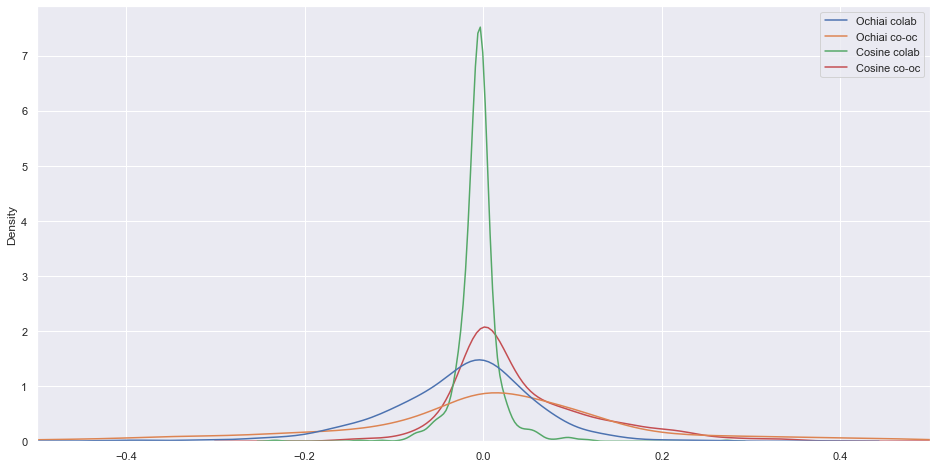

In [51]:
info_x=[]

for nor in ['ochiai','cosine']:
    for c in ['colab', 'project']:
        for y in ['_14151617', '_18192021']:
            cur_path = os.getcwd()
            count = c
            normalization = nor
            filename = filename = 'dm_' + normalization + '_41_' +  count + y + '.csv'
            new_path = os.path.relpath('..\\Distance_matrices\\new_dms/'+filename, cur_path)
            df = pd.read_csv(new_path,index_col=0)
            array=np.array(lower_triangle(df.to_numpy()))
            
            if y in ['_18192021']:
                changes = array-previous_array
                info_x=info_x+[changes]

            previous_array= array 
            
df_x=pd.DataFrame(np.transpose(info_x), columns=['Ochiai colab', 'Ochiai co-oc', 'Cosine colab', 'Cosine co-oc'])
plot=sns.kdeplot(data=df_x)
plot.set_xlim(-0.5,0.5)
plot.show()

In [59]:
info=[]
for nor in ['ochiai','cosine']:
    for c in ['colab', 'project', 'disc_in_a_person']:
        if c == 'project':
            continue
        for y in ['_141516', '_1718', '_192021']:
            cur_path = os.getcwd()
            count = c
            normalization = nor
            filename = 'dm_' + count+ '_' + normalization + y + '.csv'
            new_path = os.path.relpath('..\\Distance_matrices\\dms_with_time_windows/'+filename, cur_path)
            df = pd.read_csv(new_path,index_col=0)
            array=np.array(lower_triangle(df.to_numpy()))
            density=1 - np.count_nonzero(array ==1)/len(array)
            average=np.mean(array)
            if y in ['_1718', '_192021']:
                avg_change=np.mean(np.absolute(array-previous_array))
                max_change=np.max(np.absolute(array-previous_array))
            else:
                avg_change=0
                max_change=0
            previous_array= array 
            row = [y, nor, c, density, average, avg_change, max_change]
            info=info+[row]

pd.DataFrame(info, columns=['year', 'normalization', 'count', 'density', 'average', 'average change', 'max change '])